In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
import datetime

2025-05-11 13:47:56.065167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746971276.268949      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746971276.325557      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-05-11 13:48:07--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.107.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2025-05-11 13:48:07 (95.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!wget https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py

--2025-05-11 13:48:07--  https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2693 (2.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.63K  --.-KB/s    in 0s      

2025-05-11 13:48:07 (58.3 MB/s) - ‘helper_functions.py’ saved [2693/2693]



In [4]:
from helper_functions import unzip,create_tensorboard_callback

In [5]:
unzip("nlp_getting_started.zip")

In [6]:
train_data = pd.read_csv("train.csv")
test_data =pd.read_csv("test.csv")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [9]:
test_data.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [10]:
train_data["target"].count()

7613

In [11]:
train_data["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [12]:
# check for imbalance data 

<Axes: xlabel='target', ylabel='count'>

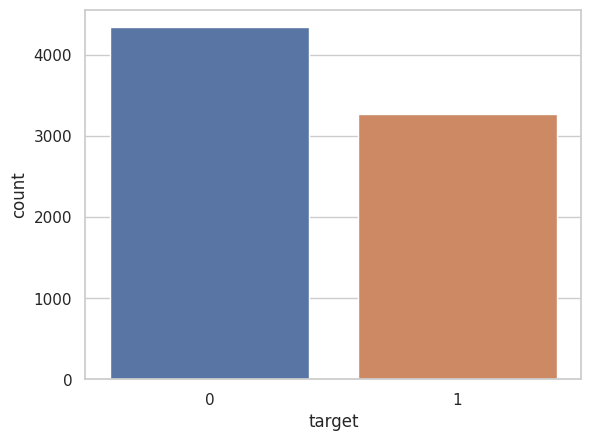

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x="target",data=train_data)

In [14]:
len(train_data), len(test_data)

(7613, 3263)

In [15]:
# lets visualize some random example from the train data 
random_index = random.randint(0, len(train_data)-5)
for row in train_data[random_index: random_index + 5][["text","target"]].itertuples():
    _,text,target = row
    print(f"Target: {target}","Real diaster" if target >0 else "Not Diaster")
    print(text)
    print("____\n")

Target: 0 Not Diaster
Do you feel like you are sinking in low self-image? Take the quiz: http://t.co/JvjALYg2n1 http://t.co/qXMWELJbc0
____

Target: 1 Real diaster
After a Few Years Afloat Pension Plans Start Sinking Again http://t.co/4cEEuzWHvf
____

Target: 0 Not Diaster
Do you feel like you are sinking in unhappiness? Take the quiz: http://t.co/OrJb3j803F http://t.co/MWdHXYfrag
____

Target: 0 Not Diaster
With a sinking music video tv career Brooke Hogan should be THANKING her Dad for the free publicity...although I doubt it will help her.
____

Target: 0 Not Diaster
@supernovalester I feel so bad for them. I can literally feel that feeling of your heart sinking bc you didn't get anyone ugh jfc
____



In [16]:
# now we have to split the data into train and validation 
from sklearn.model_selection import train_test_split
X = train_data["text"]
y= train_data["target"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [17]:
print(f"train: {len(train_data)}")
print(f"X_train:  {len(X_train)}")
print(f"X_val:  {len(X_val)}")
print(f"10% of train data is {math.ceil(len(train_data)* 0.1)}")


train: 7613
X_train:  6851
X_val:  762
10% of train data is 762


## Convert text data into number 

In [18]:
list(zip(y_train[:3],X_train[:3]))

[(0,
  "'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j"),
 (1,
  'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3'),
 (0,
  "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol")]

In [19]:
text_into_number = tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split="whitespace",
    output_mode='int',
    ngrams= None,
    output_sequence_length=None, # take the length of the 
)


I0000 00:00:1746971289.451268      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [20]:
text_into_number.adapt(X_train)

In [21]:
text_into_number(X_train[7]).numpy()


array([  32,   11,  255,    6,    2, 1834,    7,    8,   71,   97,    3,
         44,    4,    2, 6639])

In [22]:
# count vectorizer we have to create the vocabulary 

X_train[7]

"I'm on top of the hill and I can see a fire in the woods..."

In [23]:
text_into_number.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [24]:
text_into_number.vocabulary_size()

21089

In [25]:


text = []
for index in [3210, 55, 4768, 1338, 247, 1268,4,87]:
    text.append(text_into_number.get_vocabulary()[index])
" ".join(text)

'13000 people receive wildfires evacuation orders in california'

In [26]:
X_train[3]

'13,000 people receive #wildfires evacuation orders in California '

In [27]:
# average length of sentence of train dataset
round(sum([len(x.split(" ")) for x in X_train])/len([len(x.split(" ")) for x in X_train]))

15

In [28]:
max_features =10000
sequence_length = 15 # average length of the sentences of the train dataset

vectorizer_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)
vectorizer_layer.adapt(X_train)

In [29]:
vectorizer_layer(X_train[7]).numpy()

array([  32,   11,  255,    6,    2, 1834,    7,    8,   71,   97,    3,
         44,    4,    2, 6639])

In [30]:
vectorizer_layer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [31]:
X_train[7]

"I'm on top of the hill and I can see a fire in the woods..."

In [32]:
vectorizer_layer(X_train[3])

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([3210,   55, 4768, 1338,  247, 1268,    4,   87,    0,    0,    0,
          0,    0,    0,    0])>

In [33]:
vectorizer_layer(X_train)

<tf.Tensor: shape=(6851, 15), dtype=int64, numpy=
array([[   1, 2317,    5, ...,    0,    0,    0],
       [ 296, 2367, 2226, ...,    0,    0,    0],
       [  45,    8,   23, ..., 9495,  160,    0],
       ...,
       [   1,    1, 1904, ...,    1,    0,    0],
       [ 573,  140,    3, ...,    3,  481,  953],
       [   8, 1807,    5, ...,   89,   15,   40]])>

In [34]:
random_sentence = random.choice(X_train)
print(f"{random_sentence}")
print(f"{vectorizer_layer(random_sentence)}")

New Ladies Shoulder Tote Handbag Women Cross Body Bag Faux Leather Fashion Purse - Full reÛ_ http://t.co/BLAAWHYScT http://t.co/dDR0zjXVQN
[  52  844  568 1099 1005  473  293   86  372 1202  769 1077 1171  125
  646]


In [35]:
len(vectorizer_layer.get_vocabulary())

10000

In [36]:
print(vectorizer_layer.get_vocabulary()[:5]) # most common words
print(vectorizer_layer.get_vocabulary()[-5:]) # least common words

['', '[UNK]', 'the', 'a', 'in']
['pakthey', 'pakistan\x89Ûªs', 'pakistans', 'pajamas', 'paints']


## Creating Embedding Using An Embedding Layer Of TensorFlow

In [37]:
# now we have to make the embedding for the words 
embedding_layer = tf.keras.layers.Embedding(
    input_dim = len(vectorizer_layer.get_vocabulary()),
    output_dim= 128,
    embeddings_initializer = "uniform"
)



In [38]:

random_sentence = random.choice(X_train)
print(f"{random_sentence}")
print(f"{vectorizer_layer(random_sentence)}")


Monsoon Flooding Kills Dozens In Myanmar Prompting Calls For Help - http://t.co/r7vPaKlhvI
[2858  246  435 2506    4  839 9536 1703   10  155    1    0    0    0
    0]


In [39]:
embedding_layer(vectorizer_layer(random_sentence))

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.02790115, -0.01474525,  0.04932933, ..., -0.00760002,
        -0.03236466, -0.02809668],
       [-0.00017817, -0.02040484, -0.02159711, ..., -0.00306653,
         0.01104158, -0.0118681 ],
       [ 0.03257236,  0.03354793, -0.04738374, ...,  0.04144991,
         0.02896227,  0.00158259],
       ...,
       [ 0.0034783 ,  0.00252777, -0.00564467, ..., -0.00176225,
         0.03540684, -0.02461997],
       [ 0.0034783 ,  0.00252777, -0.00564467, ..., -0.00176225,
         0.03540684, -0.02461997],
       [ 0.0034783 ,  0.00252777, -0.00564467, ..., -0.00176225,
         0.03540684, -0.02461997]], dtype=float32)>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,precision_recall_fscore_support

In [41]:
model_0 = Pipeline([('tfidf', TfidfVectorizer()), ('MultinomialNB', MultinomialNB())])
model_0.fit(X_train,y_train)
ypred = model_0.predict(X_val)

In [42]:
model_0.score(X_val,y_val)

0.7782152230971129

In [43]:
def calculate_results(y_true, y_pred):
    """Calculate Model Accuracy, Precision, Recall  and F1-Score"""
    accuracy = accuracy_score(y_true, y_pred)
    precision,recall,fscore,_ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return {
        "accuracy": accuracy,
        "precison": precision,
        "recall":recall,
        "f1_score": fscore
    }
    

In [44]:
baseline_model_result = calculate_results(y_val, ypred)
baseline_model_result

{'accuracy': 0.7782152230971129,
 'precison': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1_score': 0.7703527809038113}

## Model 1: Feed Forward Neural Network


In [45]:
input_layer =   tf.keras.Input(shape=(1,),dtype=tf.string)
x= vectorizer_layer(input_layer)
x = embedding_layer(x)
# x =tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.GlobalAveragePooling1D()(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(input_layer, output_layer, name="model_1") 

In [46]:
model_1.summary()
# data_format='channels_last': 3D tensor with shape: (batch_size, steps, features)
# 

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

In [48]:
history_1 = model_1.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_1")]
)

Saved tensorboard log files to model_log/model_1/20250511-134812
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6152 - loss: 0.6657 - val_accuracy: 0.6509 - val_loss: 0.6328
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6971 - loss: 0.5959 - val_accuracy: 0.6485 - val_loss: 0.6300
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6947 - loss: 0.5743 - val_accuracy: 0.6496 - val_loss: 0.6388
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6976 - loss: 0.5630 - val_accuracy: 0.6514 - val_loss: 0.6376
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6951 - loss: 0.5586 - val_accuracy: 0.6518 - val_loss: 0.6428


1. batch_size:
Number of samples processed together in one forward/backward pass.
For example, if you set batch_size = 32, the model will process 32 sequences at a time.

2. steps (or timesteps):
The number of time steps in each sequence.
In NLP, this might be the number of words or tokens in a sentence.

3. features:
The number of features per step.
In NLP, this could be the embedding dimension.


In [49]:
model_1.evaluate(X_val,y_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - loss: 0.6488 


[0.642821192741394, 0.6517935991287231]

In [50]:
model_1_pred =np.round(np.mean(tf.squeeze(model_1.predict(X_val)),axis=1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [51]:
model_1_result = calculate_results(y_val,model_1_pred)
model_1_result

{'accuracy': 0.7401574803149606,
 'precison': 0.7960250608208859,
 'recall': 0.7401574803149606,
 'f1_score': 0.716299716646126}

In [52]:
baseline_model_result

{'accuracy': 0.7782152230971129,
 'precison': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1_score': 0.7703527809038113}

## Model_2 with GlobalAveragePooling Layer

In [53]:
input_layer =   tf.keras.Input(shape=(1,),dtype=tf.string)
x= vectorizer_layer(input_layer)
x = embedding_layer(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_2 = tf.keras.Model(input_layer, output_layer, name="model_2") 

In [54]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])
history_2 = model_2.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_2")]
)

Saved tensorboard log files to model_log/model_2/20250511-134823
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6145 - loss: 0.6340 - val_accuracy: 0.7717 - val_loss: 0.5300
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.4227 - val_accuracy: 0.7913 - val_loss: 0.4807
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8787 - loss: 0.3266 - val_accuracy: 0.7979 - val_loss: 0.4741
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8992 - loss: 0.2693 - val_accuracy: 0.7979 - val_loss: 0.4815
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9173 - loss: 0.2292 - val_accuracy: 0.7874 - val_loss: 0.4967


In [56]:
model_2_pred = model_2.predict(X_val)
model_2_pred = tf.round(tf.squeeze(model_2_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [57]:
model_2_result = calculate_results(y_val,model_2_pred)
model_2_result

{'accuracy': 0.7874015748031497,
 'precison': 0.7894616073868839,
 'recall': 0.7874015748031497,
 'f1_score': 0.7846007134492144}

## Visualize The Embeddings 

In [58]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [59]:
weights = model_2.get_layer('embedding').get_weights()[0]
vocab = vectorizer_layer.get_vocabulary()

In [60]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [61]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [62]:
import zipfile

with zipfile.ZipFile('/kaggle/working/embeddings.zip', 'w') as zipf:
    zipf.write('vectors.tsv')
    zipf.write('metadata.tsv')


## Simple Recurrent Neural Network 

In [63]:
input_layer =   tf.keras.Input(shape=(1,),dtype=tf.string) 
x= vectorizer_layer(input_layer)
x = embedding_layer(x)
x= tf.keras.layers.SimpleRNN(32)(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(input_layer, output_layer, name="model_2") 



In [64]:
model_3.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,185 (4.90 MB)

 Trainable params: 1,285,185 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])
history_3 = model_3.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_3")]
)

Saved tensorboard log files to model_log/model_3/20250511-134831
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8775 - loss: 0.3124 - val_accuracy: 0.7717 - val_loss: 0.6099
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9535 - loss: 0.1418 - val_accuracy: 0.7388 - val_loss: 0.6614
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9623 - loss: 0.1082 - val_accuracy: 0.7507 - val_loss: 0.6736
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9740 - loss: 0.0809 - val_accuracy: 0.7493 - val_loss: 0.7738
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9784 - loss: 0.0563 - val_accuracy: 0.7467 - val_loss: 0.9417


In [66]:
model_3_pred = tf.round(tf.squeeze(model_3.predict(X_val)))
model_3_result = calculate_results(y_val,model_3_pred)
model_3_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


{'accuracy': 0.7467191601049868,
 'precison': 0.7459682714875913,
 'recall': 0.7467191601049868,
 'f1_score': 0.7461242088395041}

In [67]:
model_2_result 


{'accuracy': 0.7874015748031497,
 'precison': 0.7894616073868839,
 'recall': 0.7874015748031497,
 'f1_score': 0.7846007134492144}

## Long Short-Term Memory (LSTM) 
LSTM is a type of recurent neural network which is designed to overcome the vanishing gradient problem.
lstm is used in time forecasting, natural language processing, audio, video.

In [68]:
input_layer = tf.keras.Input(shape=(1,),dtype="string")
x= vectorizer_layer(input_layer) # vectorizer layer whcih convert text to index
x = embedding_layer(x) # which create embedding for each word from the index
x = tf.keras.layers.LSTM(64,return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_4 =  tf.keras.Model(input_layer, output_layer)

# when we have to use the return sequence in lstm when we have to stack the lstm on each other 

In [69]:
model_4.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 15, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,362,497 (5.20 MB)

 Trainable params: 1,362,497 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

history_4 = model_4.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_4")]
)

Saved tensorboard log files to model_log/model_4/20250511-134854
Epoch 1/5


I0000 00:00:1746971337.722883      88 cuda_dnn.cc:529] Loaded cuDNN version 90300


215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9373 - loss: 0.2316 - val_accuracy: 0.7388 - val_loss: 0.6840
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9699 - loss: 0.0890 - val_accuracy: 0.7572 - val_loss: 0.7274
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9734 - loss: 0.0673 - val_accuracy: 0.7533 - val_loss: 0.9498
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9763 - loss: 0.0589 - val_accuracy: 0.7559 - val_loss: 1.1644
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9773 - loss: 0.0508 - val_accuracy: 0.7388 - val_loss: 1.2749


In [71]:

model_4_result = calculate_results(y_val,tf.round(tf.squeeze(model_3.predict(X_val))))
model_4_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


{'accuracy': 0.7454068241469817,
 'precison': 0.7445094031782488,
 'recall': 0.7454068241469817,
 'f1_score': 0.7445369708413149}

## Gated Recurrent Unit (GRU): 

A Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) that is a variation of the Long Short-Term Memory (LSTM) network, but with a simpler architecture. GRUs are used to process sequential data and are known for their ability to handle long-range dependencies in data, like LSTMs. 

In [72]:

input_layer = tf.keras.Input(shape=(1,),dtype="string")
x= vectorizer_layer(input_layer) # vectorizer layer whcih convert text to index
x = embedding_layer(x) 
x= tf.keras.layers.GRU(64)(x)
output_layer =  tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_5 =  tf.keras.Model(input_layer, output_layer)


In [73]:
model_5.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

history_5 = model_5.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_5")]
)

Saved tensorboard log files to model_log/model_5/20250511-134906
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8783 - loss: 0.2910 - val_accuracy: 0.7362 - val_loss: 0.9280
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9778 - loss: 0.0633 - val_accuracy: 0.7625 - val_loss: 0.8458
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9754 - loss: 0.0604 - val_accuracy: 0.7349 - val_loss: 1.0821
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9772 - loss: 0.0520 - val_accuracy: 0.7520 - val_loss: 1.2804
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9793 - loss: 0.0435 - val_accuracy: 0.7480 - val_loss: 1.5436


In [75]:

model_5_result = calculate_results(y_val,tf.round(tf.squeeze(model_5.predict(X_val))))
model_5_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


{'accuracy': 0.7480314960629921,
 'precison': 0.7471935106408912,
 'recall': 0.7480314960629921,
 'f1_score': 0.7464295601234091}

## Bidirectional Recurrent Neural Network 
Bidirectional recurrent neural networks connect two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past and future states simultaneously.

In [76]:

input_layer = tf.keras.Input(shape=(1,),dtype="string")
x= vectorizer_layer(input_layer) # vectorizer layer whcih convert text to index
x = embedding_layer(x) 
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(x)
x= tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(x)
output_layer =  tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_6 = tf.keras.Model(input_layer, output_layer)

In [77]:
model_6.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 15, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

history_6 = model_6.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_6")]
)


Saved tensorboard log files to model_log/model_6/20250511-134915
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9465 - loss: 0.1642 - val_accuracy: 0.7323 - val_loss: 0.9838
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9779 - loss: 0.0480 - val_accuracy: 0.7441 - val_loss: 1.3732
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9814 - loss: 0.0373 - val_accuracy: 0.7297 - val_loss: 1.4612
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9850 - loss: 0.0306 - val_accuracy: 0.7388 - val_loss: 1.3874
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9846 - loss: 0.0312 - val_accuracy: 0.7375 - val_loss: 1.1343


In [79]:

model_6_result = calculate_results(y_val,tf.round(tf.squeeze(model_6.predict(X_val))))
model_6_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


{'accuracy': 0.7375328083989501,
 'precison': 0.7367751025033591,
 'recall': 0.7375328083989501,
 'f1_score': 0.7369694318513216}

### CNN For Text Classification

In [80]:
input_layer = tf.keras.Input(shape=(1,),dtype="string")
x= vectorizer_layer(input_layer) # vectorizer layer whcih convert text to index
x = embedding_layer(x) 
x = tf.keras.layers.Conv1D(filters=32,kernel_size=5, activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_7 =  tf.keras.Model(input_layer, output_layer)




In [81]:
model_7.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 11, 32)              │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300,545 (4.96 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=["accuracy"])

history_7 = model_6.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_7")]
)



Saved tensorboard log files to model_log/model_7/20250511-134933
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9847 - loss: 0.0370 - val_accuracy: 0.7231 - val_loss: 1.5884
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9788 - loss: 0.0369 - val_accuracy: 0.7283 - val_loss: 1.2817
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9810 - loss: 0.0382 - val_accuracy: 0.7375 - val_loss: 1.4362
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9851 - loss: 0.0295 - val_accuracy: 0.7441 - val_loss: 1.3474
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9850 - loss: 0.0287 - val_accuracy: 0.7178 - val_loss: 1.7605


In [83]:
model_7_result = calculate_results(y_val,tf.round(tf.squeeze(model_7.predict(X_val))))
model_7_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 


{'accuracy': 0.515748031496063,
 'precison': 0.38519730300764066,
 'recall': 0.515748031496063,
 'f1_score': 0.3999713227923789}

## Model-8: Tensorflow Pretrained sentence Encoder  

universal sentence encoder

In [84]:
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")


In [85]:
# url = 'https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2'
url = 'https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2'
universal_encoder = hub.KerasLayer(url,
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE")



In [86]:
import os
import keras
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"

# Loading the Model
model_path = "/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2"

@keras.saving.register_keras_serializable(package="MyLayers")
class UniversalSentenceEncoder(tf.keras.layers.Layer):
    def __init__(self, model_path, model_trainable=True, **kwargs):
        super().__init__(**kwargs)
        self.hub_layer = hub.KerasLayer(
            model_path, trainable=model_trainable, input_shape=[], dtype=tf.string
        )
    
    def call(self, X):
        return self.hub_layer(X)

In [87]:


# tf.keras.backend.clear_session()

# Instantiating and Loading the Universal Sentence Encoder
hub_model = UniversalSentenceEncoder(model_path, model_trainable=False)

# Input Layer
input_layer = tf.keras.layers.Input(shape=[], dtype=tf.string)

# Hub Layers
hub_encoding = hub_model(input_layer)

# Downstream Layers
dense_1 = tf.keras.layers.Dense(64, activation="relu")(hub_encoding)
dense_1 = tf.keras.layers.BatchNormalization()(dense_1)
dense_1 = tf.keras.layers.Dropout(0.5)(dense_1)

dense_2 = tf.keras.layers.Dense(32, activation="relu")(dense_1)
dense_2 = tf.keras.layers.BatchNormalization()(dense_2)
dense_2 = tf.keras.layers.Dropout(0.5)(dense_2)
# Output Layer
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dense_2)

# Constructing the Model with the pretrained hub_model
universal_sentence_model = tf.keras.models.Model(
    inputs=[input_layer], outputs=[output_layer]
)

universal_sentence_model.summary()


# hidden = Dense(128, activation='relu', kernel_initializer='he_normal')(embedding_vector)
# hidden = BatchNormalization()(hidden)  # Normalize activations
# hidden = Dropout(0.5)(hidden)  # Reduce overfitting
# hidden = Dense(64, activation='relu', kernel_initializer='he_normal')(hidden)
# hidden = BatchNormalization()(hidden) 
# hidden = Dropout(0.3)(hidden)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ universal_sentence_encoder           │ (None, 512)                 │               0 │
│ (UniversalSentenceEncoder)           │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,137 (137.25 KB)

 Non-trainable params: 192 (768.00 B)

In [88]:

universal_sentence_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              jit_compile=False,
              metrics=["accuracy"])

history_8 = universal_sentence_model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val,y_val),   
    epochs=10,
    callbacks=[create_tensorboard_callback("model_log","model_8")]
)



Saved tensorboard log files to model_log/model_8/20250511-135023
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6230 - loss: 0.8124 - val_accuracy: 0.7887 - val_loss: 0.5762
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7643 - loss: 0.5187 - val_accuracy: 0.8163 - val_loss: 0.4582
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7980 - loss: 0.4725 - val_accuracy: 0.8228 - val_loss: 0.4130
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8117 - loss: 0.4285 - val_accuracy: 0.8255 - val_loss: 0.4081
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8210 - loss: 0.4265 - val_accuracy: 0.8228 - val_loss: 0.4061
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8249 - loss: 0.4154 - val_accuracy: 0.8268 - val_loss: 0.4068
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8268 - loss: 0.3987 - val_accuracy: 0.8215 - val_loss: 0.4069
Epoch 8/10
215/215 ━━━━━━━━━━━━

In [89]:
universal_sentence_model.evaluate(X_val,y_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8300 - loss: 0.4056


[0.4039511978626251, 0.8280839920043945]

In [90]:
# what is the best plan to do this 

model_8_result = calculate_results(y_val,tf.round(tf.squeeze(universal_sentence_model.predict(X_val))))
model_8_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


{'accuracy': 0.8280839895013123,
 'precison': 0.8322787050054684,
 'recall': 0.8280839895013123,
 'f1_score': 0.8256340544852978}

## Model_9: TF Hub Pretrained USE but with 10% of train dataset
Transfer Learning really help you when you dont have a large dataset 

In [91]:
# 10% of train dataset  using train_test_split
_, X_train_10, _, y_train_10 = train_test_split(
    X, y, test_size=0.1, random_state=102)

In [92]:


universal_sentence_model_10 = tf.keras.models.clone_model(universal_sentence_model)

universal_sentence_model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              jit_compile=False,
              metrics=["accuracy"])

history_9 = universal_sentence_model_10.fit(
    X_train_10, 
    y_train_10,
    validation_data=(X_val,y_val),   
    epochs=5,
    callbacks=[create_tensorboard_callback("model_log","model_9")]
)

# universal_sentence_model_10.summary()

Saved tensorboard log files to model_log/model_9/20250511-135105
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5413 - loss: 0.9782 - val_accuracy: 0.6969 - val_loss: 0.6784
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6738 - loss: 0.6582 - val_accuracy: 0.7218 - val_loss: 0.6616
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7376 - loss: 0.5696 - val_accuracy: 0.6877 - val_loss: 0.6452
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7757 - loss: 0.4937 - val_accuracy: 0.7021 - val_loss: 0.6315
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7629 - loss: 0.5032 - val_accuracy: 0.6745 - val_loss: 0.6169


In [93]:
universal_sentence_model_10.evaluate(X_val,y_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6801 - loss: 0.6147


[0.6169312000274658, 0.6745406985282898]

In [94]:
model_9_result = calculate_results(y_val,tf.round(tf.squeeze(universal_sentence_model_10.predict(X_val))))
model_9_result

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


{'accuracy': 0.6745406824146981,
 'precison': 0.7808846204391351,
 'recall': 0.6745406824146981,
 'f1_score': 0.6189548157166974}

## Compare Results Of Different Experiments

In [95]:
df = pd.DataFrame({
    "baseline": baseline_model_result,
    "ANN": model_1_result,
    "ANN_GAP_Layer": model_2_result,
    "Simple_RNN":model_3_result,
    "LSTM":model_4_result,
    "GRU":model_5_result,
    "BRNN":model_6_result,
    "CNN_1D":model_7_result,
    "universal_sentence_model":model_8_result,
    "universal_sentence_model_10":model_9_result
    
})
df

,baseline,ANN,ANN_GAP_Layer,Simple_RNN,LSTM,GRU,BRNN,CNN_1D,universal_sentence_model,universal_sentence_model_10
accuracy,0.778215,0.740157,0.787402,0.746719,0.745407,0.748031,0.737533,0.515748,0.828084,0.674541
precison,0.792992,0.796025,0.789462,0.745968,0.744509,0.747194,0.736775,0.385197,0.832279,0.780885
recall,0.778215,0.740157,0.787402,0.746719,0.745407,0.748031,0.737533,0.515748,0.828084,0.674541
f1_score,0.770353,0.716300,0.784601,0.746124,0.744537,0.746430,0.736969,0.399971,0.825634,0.618955


In [96]:
import plotly.express as px




index = ['accuracy', 'precision', 'recall', 'f1_score']

# Reshape to long format
df_reset = df.reset_index().rename(columns={'index': 'Metric'})
df_long = pd.melt(df_reset, id_vars=['Metric'], var_name='Model', value_name='Score')
# Custom colors for metrics
color_map = {
    'accuracy': '#4C78A8',   # Cool Blue
    'precision': '#F58518',  # Soft Orange
    'recall': '#54A24B',     # Refined Green
    'f1_score': '#E45756'    # Soft Red
}

# Create Plotly bar plot
fig = px.bar(
    df_long,
    x='Model',
    y='Score',
    color='Metric',
    color_discrete_map=color_map,
    barmode='group',
    title='Different Models Result Comparison on Metrics'
)

# Dark theme settings
fig.update_layout(
    template='seaborn',
    xaxis_tickangle=-45,
    title_font_size=20,
    legend_title_text='Metric',
    margin=dict(t=60, b=100)
)

fig.show()

In [97]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set dark theme for plot
# plt.style.use('dark_background')
# sns.set_theme(style="darkgrid", palette="deep")

# custom_palette = {
#     'accuracy': '#1f77b4',   # blue
#     'precision': '#ff7f0e',  # orange
#     'recall': '#2ca02c',     # green
#     'f1_score': '#d62728'    # red
# }
# # Reset index for melting
# df_reset = df.reset_index().rename(columns={'index': 'metric'})

# # Melt to long format
# df_long = pd.melt(df_reset, id_vars=['metric'], var_name='Model', value_name='Score')

# # Plot using seaborn
# plt.figure(figsize=(20, 8))
# sns.barplot(data=df_long, x='Model', y='Score', hue='metric',palette=custom_palette)
# plt.xticks(rotation=45)
# plt.title("Model Performance Comparison")
# plt.tight_layout()
# plt.show()


## Save the best model 

model.save('my_model.keras')


new_model = tf.keras.models.load_model('my_model.keras')
new_model.summary()

In [98]:
universal_sentence_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ universal_sentence_encoder           │ (None, 512)                 │               0 │
│ (UniversalSentenceEncoder)           │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,605 (412.52 KB)

 Trainable params: 35,137 (137.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 70,276 (274.52 KB)

In [99]:
universal_sentence_model.save("use_model.keras")

In [100]:
# Upon loading, pass a dict containing the custom objects used in the
# `custom_objects` argument of `keras.models.load_model()`.
reconstructed_model = keras.models.load_model(
    "use_model.keras",
    custom_objects={"CustomLayer": UniversalSentenceEncoder }
)

In [101]:
reconstructed_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ universal_sentence_encoder           │ (None, 512)                 │               0 │
│ (UniversalSentenceEncoder)           │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,605 (412.52 KB)

 Trainable params: 35,137 (137.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 70,276 (274.52 KB)

In [102]:
reconstructed_model.evaluate(X_val, y_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8300 - loss: 0.4056


[0.40395113825798035, 0.8280839920043945]

## Find the most Wrong Examples

In [103]:
use_pretrained = reconstructed_model

In [104]:
use_pretrained_pre_probs =tf.squeeze(use_pretrained.predict(X_val))
use_pretrained_pred = tf.round(use_pretrained_pre_probs)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [105]:
sentence_df = pd.DataFrame({
    "sentence": X_val,
    "Target": y_val,
    "prediction":tf.cast(use_pretrained_pred,dtype=tf.int64),
    "pred_prob": use_pretrained_pre_probs
})

In [106]:
sentence_df[:20]

,sentence,Target,prediction,pred_prob
2644,So you have a new weapon that can cause un-ima...,1,0,0.080731
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0,0,0.125995
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1,0,0.415139
132,Aftershock back to school kick off was great. ...,0,0,0.174847
6845,in response to trauma Children of Addicts deve...,0,0,0.191080
5559,@Calum5SOS you look like you got caught in a r...,0,0,0.128698
1765,my favorite lady came to our volunteer meeting...,1,0,0.082100
1817,@brianroemmele UX fail of EMV - people want to...,1,0,0.083729
6810,Can't find my ariana grande shirt this is a f...,0,0,0.451396
4398,The Murderous Story Of AmericaÛªs First Hijac...,1,1,0.815164


In [107]:
# most wrong predictions and sorted by pred_prob
sentence_df[sentence_df["Target"] != sentence_df["prediction"]].sort_values("pred_prob",ascending=False)[:10]

,sentence,Target,prediction,pred_prob
6634,HereÛªs how media in Pakistan covered the cap...,0,1,0.944316
2592,Russian customs destroyed a total of 319 tons ...,0,1,0.942700
5113,Over half of poll respondents worry nuclear di...,0,1,0.937172
7057,USW: 'The damage from abandoning the deal coul...,0,1,0.896226
3821,Juneau Empire - First responders turn out for ...,0,1,0.880379
6161,I hate this damn Milwaukee IndyFest. All the c...,0,1,0.867119
7064,Upheaval high note for bush opera http://t.co/...,0,1,0.846747
6872,Today was trauma on top of trauma on top of t...,0,1,0.842217
6587,Survivors of Shanghai Ghetto reunite after 70 ...,0,1,0.842001
2543,Putin's plan to destroy Western food en masse ...,0,1,0.828491


In [108]:
X_val[6634]

'Here\x89Ûªs how media in Pakistan covered the capture of terrorist Mohammed Naved http://t.co/f7WqpCEkg2'